In [1]:
import os
from keras.models import Sequential,load_model
from keras.layers import LSTM,Dropout,TimeDistributed,Dense,Activation,Embedding
import numpy as np
import json
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
BATCH_SIZE=64
SEQUENCE_LENGTH=64

In [3]:
def get_model(vocabulary_size):
    model=Sequential()
    model.add(Embedding(vocabulary_size,512,batch_input_shape=(BATCH_SIZE,SEQUENCE_LENGTH)))
    
    model.add(LSTM(256,return_sequences=True,stateful=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(256,return_sequences=True,stateful=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(256,return_sequences=True,stateful=True))
    model.add(Dropout(0.2))
    
    model.add(TimeDistributed(Dense(vocabulary_size)))
    
    model.add(Activation('softmax'))
    
    return model

In [4]:
def generate_batches(text,vocabulary_size):
    length=text.shape[0]
    characters_per_batch=int(length/BATCH_SIZE)
    
    end_range=characters_per_batch-SEQUENCE_LENGTH
    for start in range(0,end_range,SEQUENCE_LENGTH):
        x=np.zeros((BATCH_SIZE,SEQUENCE_LENGTH))
        y=np.zeros((BATCH_SIZE,SEQUENCE_LENGTH,vocabulary_size))
        
        for batch_number in range(0,BATCH_SIZE):
            for i in range(0,SEQUENCE_LENGTH):
                offset=characters_per_batch*batch_number+start+i
                x[batch_number,i]=text[offset]
                y[batch_number,i,text[offset+1]]=1
        
        yield x,y

In [5]:
def train_model(text,num_epochs=75,save_model_freq=10):
    abc_to_index={}
    
    for idx,character in enumerate(sorted(list(set(text)))):
        abc_to_index[character]=idx
    
    with open(os.path.join('./data','character_to_index.json'),'w')as f:
        json.dump(abc_to_index,f)
    
    index_to_abc={}
    for (character,index) in abc_to_index.items():
        index_to_abc[index]=character
    
    num_characters_in_file=len(abc_to_index)
    
    model=get_model(num_characters_in_file)
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    transformed_text=[]
    for char in text:
        transformed_text.append(abc_to_index[char])
    
    transformed_text=np.array(transformed_text,dtype=np.int32)
    
    print(f'Size of text : {transformed_text.size}')
    
    iterations_per_epoch=(len(text)/BATCH_SIZE-1)/SEQUENCE_LENGTH
    losses=[]
    accuracy=[]
    for epoch in range(num_epochs):
        print(f'Epoch number {epoch}/{num_epochs}')
        curr_loss=0
        curr_acc=0
        for i,(x,y) in enumerate(generate_batches(transformed_text,num_characters_in_file)):
            
            loss,acc=model.train_on_batch(x,y)
            
            curr_loss+=loss
            curr_acc+=acc
        losses.append(np.average(curr_loss))
        accuracy.append(np.average(curr_acc))
        print(f'Epoch number: {epoch+1}/{num_epochs} Loss: {curr_loss} Accuracy: {curr_acc}')
            
    if((epoch+1)%save_model_freq)==0:
        model.save_weights(f'weights.{epoch}.h5')
        print(f'model for epoch {epoch} saved')
        
    return losses,accuracy

In [10]:
train_model(open('./data/input2.txt').read(),100,10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (64, 64, 512)             47616     
_________________________________________________________________
lstm_6 (LSTM)                (64, 64, 256)             787456    
_________________________________________________________________
dropout_6 (Dropout)          (64, 64, 256)             0         
_________________________________________________________________
lstm_7 (LSTM)                (64, 64, 256)             525312    
_________________________________________________________________
dropout_7 (Dropout)          (64, 64, 256)             0         
_________________________________________________________________
lstm_8 (LSTM)                (64, 64, 256)             525312    
_________________________________________________________________
dropout_8 (Dropout)          (64, 64, 256)            

Epoch number: 74/100 Loss: 50.88070368766785 Accuracy: 90.13916015625
Epoch number 74/100
Epoch number: 75/100 Loss: 50.52582895755768 Accuracy: 90.306396484375
Epoch number 75/100
Epoch number: 76/100 Loss: 49.968941658735275 Accuracy: 90.4619140625
Epoch number 76/100
Epoch number: 77/100 Loss: 49.67791649699211 Accuracy: 90.523681640625
Epoch number 77/100
Epoch number: 78/100 Loss: 49.32160213589668 Accuracy: 90.681884765625
Epoch number 78/100
Epoch number: 79/100 Loss: 49.03619006276131 Accuracy: 90.748046875
Epoch number 79/100
Epoch number: 80/100 Loss: 48.7857064306736 Accuracy: 90.8388671875
Epoch number 80/100
Epoch number: 81/100 Loss: 48.232325464487076 Accuracy: 90.996826171875
Epoch number 81/100
Epoch number: 82/100 Loss: 48.023129522800446 Accuracy: 91.08056640625
Epoch number 82/100
Epoch number: 83/100 Loss: 47.693359315395355 Accuracy: 91.15576171875
Epoch number 83/100
Epoch number: 84/100 Loss: 47.468946903944016 Accuracy: 91.225830078125
Epoch number 84/100
Epoch

([348.37733244895935,
  240.13567924499512,
  187.1689990758896,
  163.88791143894196,
  146.6145964860916,
  137.15951013565063,
  130.70749461650848,
  125.89196908473969,
  122.05225121974945,
  118.01817750930786,
  114.51537150144577,
  111.67833757400513,
  108.86915296316147,
  106.12627673149109,
  103.67598217725754,
  101.78433752059937,
  99.32758086919785,
  97.3969030380249,
  95.51879209280014,
  93.65556532144547,
  92.2240149974823,
  90.69234651327133,
  89.23445296287537,
  87.70390832424164,
  86.3704441189766,
  84.95169228315353,
  83.8251576423645,
  82.6214804649353,
  81.67857778072357,
  80.26099801063538,
  79.2075634598732,
  78.2979696393013,
  77.41204285621643,
  76.26613104343414,
  75.25383448600769,
  74.46291881799698,
  73.40546405315399,
  72.55295819044113,
  71.8401939868927,
  70.88672357797623,
  70.09938490390778,
  69.25213038921356,
  68.34479695558548,
  67.5391154885292,
  66.98218047618866,
  66.14587980508804,
  65.69505101442337,
  64.728

In [16]:
loss=[348.37733244895935,
  240.13567924499512,
  187.1689990758896,
  163.88791143894196,
  146.6145964860916,
  137.15951013565063,
  130.70749461650848,
  125.89196908473969,
  122.05225121974945,
  118.01817750930786,
  114.51537150144577,
  111.67833757400513,
  108.86915296316147,
  106.12627673149109,
  103.67598217725754,
  101.78433752059937,
  99.32758086919785,
  97.3969030380249,
  95.51879209280014,
  93.65556532144547,
  92.2240149974823,
  90.69234651327133,
  89.23445296287537,
  87.70390832424164,
  86.3704441189766,
  84.95169228315353,
  83.8251576423645,
  82.6214804649353,
  81.67857778072357,
  80.26099801063538,
  79.2075634598732,
  78.2979696393013,
  77.41204285621643,
  76.26613104343414,
  75.25383448600769,
  74.46291881799698,
  73.40546405315399,
  72.55295819044113,
  71.8401939868927,
  70.88672357797623,
  70.09938490390778,
  69.25213038921356,
  68.34479695558548,
  67.5391154885292,
  66.98218047618866,
  66.14587980508804,
  65.69505101442337,
  64.72824561595917,
  63.94964998960495,
  63.44702106714249,
  62.748350501060486,
  62.085945188999176,
  61.63971555233002,
  61.069658517837524,
  60.23662805557251,
  59.534961581230164,
  58.91059994697571,
  58.5282809138298,
  57.727463603019714,
  57.224913507699966,
  56.945483952760696,
  56.368292301893234,
  55.6882466673851,
  55.551628679037094,
  54.753887712955475,
  54.41050457954407,
  54.0006842315197,
  53.53790894150734,
  52.93193939328194,
  52.68094202876091,
  52.23447823524475,
  51.94264256954193,
  51.44470793008804,
  50.88070368766785,
  50.52582895755768,
  49.968941658735275,
  49.67791649699211,
  49.32160213589668,
  49.03619006276131,
  48.7857064306736,
  48.232325464487076,
  48.023129522800446,
  47.693359315395355,
  47.468946903944016,
  47.176453828811646,
  46.7767570912838,
  46.5812931060791,
  46.18806445598602,
  46.09403899312019,
  45.88242596387863,
  45.63790640234947,
  45.34072580933571,
  44.92330539226532,
  44.86142972111702,
  44.7670094370842,
  44.340691566467285,
  44.117566764354706,
  43.95131582021713,
  43.936662048101425,
  43.41065427660942]

In [18]:
acc= [16.674560546875,
  42.66259765625,
  54.866943359375,
  60.02685546875,
  62.907958984375,
  64.52978515625,
  65.952392578125,
  67.089111328125,
  68.162353515625,
  69.4384765625,
  70.529541015625,
  71.38623046875,
  72.208740234375,
  73.032958984375,
  73.8544921875,
  74.53515625,
  75.35888671875,
  75.860107421875,
  76.470947265625,
  76.956787109375,
  77.4716796875,
  77.84033203125,
  78.3427734375,
  78.838134765625,
  79.2373046875,
  79.6591796875,
  79.958251953125,
  80.333984375,
  80.64453125,
  81.0185546875,
  81.371826171875,
  81.684326171875,
  81.923095703125,
  82.220458984375,
  82.598388671875,
  82.861328125,
  83.171142578125,
  83.435546875,
  83.572509765625,
  83.927734375,
  84.1748046875,
  84.442138671875,
  84.737060546875,
  84.917236328125,
  85.135986328125,
  85.427490234375,
  85.5400390625,
  85.859130859375,
  86.09326171875,
  86.20751953125,
  86.383056640625,
  86.670166015625,
  86.837158203125,
  86.923828125,
  87.23583984375,
  87.392822265625,
  87.66259765625,
  87.8291015625,
  88.06689453125,
  88.1865234375,
  88.277587890625,
  88.372802734375,
  88.608154296875,
  88.63720703125,
  88.939697265625,
  89.0712890625,
  89.19677734375,
  89.300537109375,
  89.54931640625,
  89.6328125,
  89.751220703125,
  89.853759765625,
  89.993896484375,
  90.13916015625,
  90.306396484375,
  90.4619140625,
  90.523681640625,
  90.681884765625,
  90.748046875,
  90.8388671875,
  90.996826171875,
  91.08056640625,
  91.15576171875,
  91.225830078125,
  91.342041015625,
  91.421875,
  91.511962890625,
  91.675048828125,
  91.708740234375,
  91.74853515625,
  91.801513671875,
  91.8720703125,
  92.084228515625,
  92.08935546875,
  92.116943359375,
  92.21044921875,
  92.34033203125,
  92.289794921875,
  92.36767578125,
  92.490478515625]

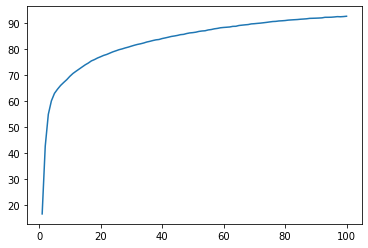

In [19]:
import matplotlib.pyplot as plt
x=range(1,101,1)
plt.plot(x,acc)

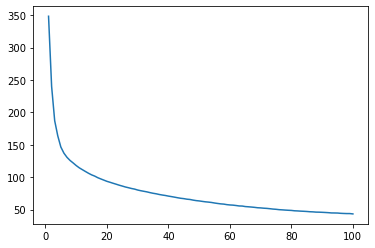

In [20]:
import matplotlib.pyplot as plt
x=range(1,101,1)
plt.plot(x,loss)

# GENERATE MUSIC

In [7]:
def get_sample_model(vocabulary_size):
    model=Sequential()
    model.add(Embedding(vocabulary_size,512,batch_input_shape=(1,1)))
    
    model.add(LSTM(256,return_sequences=True,stateful=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(256,return_sequences=True,stateful=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(256,return_sequences=False,stateful=True))
    model.add(Dropout(0.2))
    
    model.add(Dense(vocabulary_size))
    
    model.add(Activation('softmax'))
    
    return model

In [8]:
def generate_sample_music(epoch_num,header,num_of_characters):
    with open('./data/character_to_index.json') as f:
        character_to_index=json.load(f)
    
    index_to_character={}
    for ch,i in character_to_index.items():
        index_to_character[i]=ch
    
    vocabulary_size=len(character_to_index)
    model=get_sample_model(vocabulary_size)
    
    model.load_weights(f'weights.{epoch_num}.h5')
    
    sampled=[]
    for ch in header:
        sampled.append(ch)
    
    for i in range(num_of_characters):
        batch=np.zeros((1,1))
        
        if(sampled):
            batch[0,0]=sampled[-1]
        
        else:
            batch[0,0]=np.random.randint(vocabulary_size)
            
        if(i<10):
            print(f'Current Batch {i} ')
            print(batch)
        
        predictions=model.predict_on_batch(batch).ravel()
        sample=np.random.choice(range(vocabulary_size),p=predictions)
        sampled.append(sample)
        
    return ''.join(index_to_character[c] for c in sampled)

In [9]:
print(generate_sample_music(99,'',1024))

Current Batch 0 
[[2.]]
Current Batch 1 
[[26.]]
Current Batch 2 
[[0.]]
Current Batch 3 
[[26.]]
Current Batch 4 
[[40.]]
Current Batch 5 
[[28.]]
Current Batch 6 
[[69.]]
Current Batch 7 
[[0.]]
Current Batch 8 
[[51.]]
Current Batch 9 
[[26.]]
:
:I=g
T:Bland Bamos
% Nottingham Music Database
S:Chris Dewhurst 1983, via Phil Rowe
M:6/8
K:D
FE|"D"D3/2F/2A d3/2c/2d|"A7"e3/2c/2A c3/2B/2A|"D"d3 f2A|
"D"AG2A3/2B/2|"A7"c3GEC|D3 -A2D|"D"A2A A2G|F2A A2d|
"Em"e2f gfe|"G"d2B GAB|"C"c2d edc|"G"B2c d2B|
"C"c2c ecA|"G"Bcd "D7"e2f|"G"g3 -g2f|"C"e2d c2d|
"Am"e2d c2B|"D7"ABG FED|"G"G3 G3|"G"e3 -g2D|"C"G2e cBc|"G"d3 e3|\
"G"d2d "D7"e2c|[1"G"G3 G2:|[2 "G" cBG "C"A3||


X: 277
T:The Pipers of Foula
% Nottingham Music Database
S:Kevin Briggs
P:AAB
M:4/4
L:1/8
R:Hornpipe
K:G
P:A
G2|"G"G2g2 g2B2|"C"edcB "Am"A2G2|"D7"FGAB cefg|"G"(3gag(3ded "C"cBcd|
"G"edcB "D"A2(3ABA|"G"G2B2 G2AB|"C"c2cB cedc|
"G"BGDG B2cd|"C"edcB "D"AGFG|"Em"A2GB "B7"AGFE|"A7"E4 E2a2|"D"d2A2 B2:|
P:B
B2|"D"AGFA dcd2|"G"edcB "A7"A2G2|"D"FG

To listen to music ..paste the output on https://www.abcjs.net/abcjs-editor.html and click on play below the box